In [11]:
import cv2 as cv
import numpy as np
import random
import matplotlib.pyplot as plt

In [12]:
img = cv.imread("test.png")
win = cv.imread("win.png")
number_list = []
number_list.append(cv.imread("0.jpeg", 0))
number_list.append(cv.imread("1.jpeg", 0))
number_list.append(cv.imread("2.jpeg", 0))
number_list.append(cv.imread("3.jpeg", 0))
number_list.append(cv.imread("4.jpeg", 0))
number_list.append(cv.imread("5.jpeg", 0))
number_list.append(cv.imread("6.jpeg", 0))
number_list.append(cv.imread("7.jpeg", 0))
number_list.append(cv.imread("8.jpeg", 0))
number_list.append(cv.imread("9.jpeg", 0))
imageGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
result_ = np.copy(img)

In [13]:
import cv2 as cv
import numpy as np
import random
from functools import cmp_to_key
time_region_width = 40

class Number_container:
    def __init__(self, number, box, isColon = False):
        self.number = number
        self.box = box
        self.isColon = isColon

def find_region(method, img, template):
    w = template.shape[::-1][0]
    h = template.shape[::-1][1]
    res = cv.matchTemplate(img, template, method)
    _, _, _, max_loc = cv.minMaxLoc(res)
    return max_loc, (max_loc[0] + w, max_loc[1] + h), res

def find_boxes(method, img, template, threshold = 0.9):
    w = template.shape[::-1][0]
    h = template.shape[::-1][1]
    res = cv.matchTemplate(img, template, method)
    detected_boxes = []
    loc = np.where(res >= threshold)
    for pt in zip(*loc[::-1]):
        detected_boxes.append((pt, (pt[0] + w, pt[1] + h)))
    return detected_boxes

def box_center(box):
    return (box[0][0] + box[1][0]) * 0.5

def box_compare(item1, item2):
    if box_center(item1.box) < box_center(item2.box):
        return -1
    elif box_center(item1.box) > box_center(item2.box):
        return 1
    else:
        return 0

In [14]:
image = cv.imread('489.jpeg')
img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
template = cv.imread('win.jpeg', 0)
colon_template = cv.imread('dev.jpeg', 0)
method = eval('cv.TM_CCOEFF_NORMED')

In [15]:
top_left, bottom_right, _ = find_region(method, img, template)
time_region = img[top_left[1] : bottom_right[1], bottom_right[0] : bottom_right[0] + time_region_width]

In [16]:
founded_number = []
for idx, number in enumerate(number_list):
    boxes = find_boxes(method, time_region, number)
    for box in boxes:
        founded_number.append(Number_container(idx, box))
boxes = find_boxes(method, time_region, colon_template)
for box in boxes:
   founded_number.append(Number_container(-1, box, True))
founded_number = sorted(founded_number, key=cmp_to_key(box_compare))
time = ''
for number in founded_number:
     if (number.isColon):
        time += ':'
     else:
        time += str(number.number)

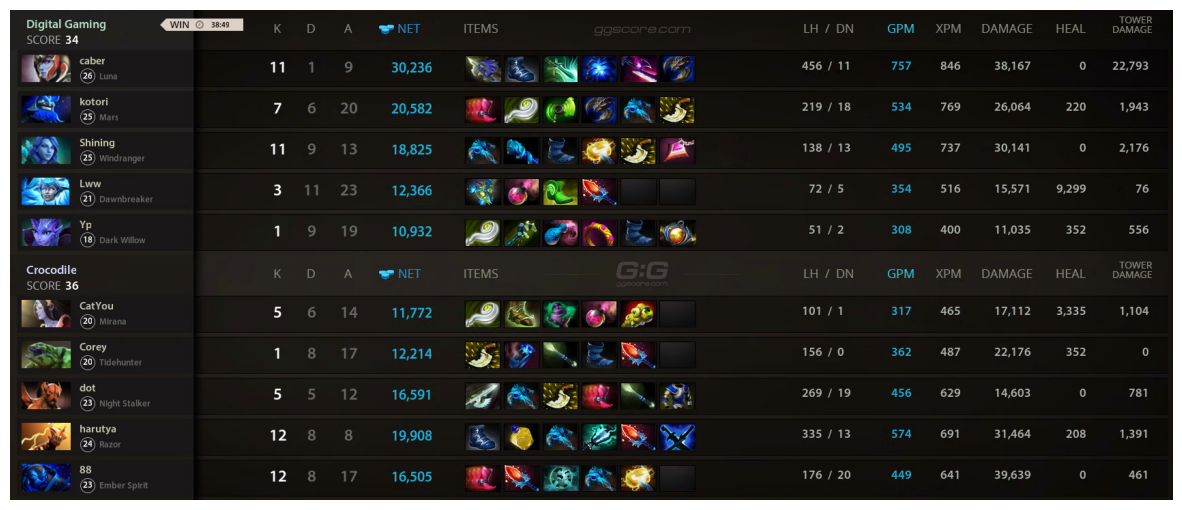

In [17]:
plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

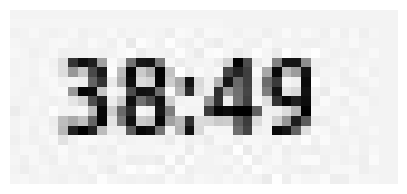

In [18]:
plt.figure(figsize=(5, 5))
plt.imshow(time_region, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
print(time)

38:49


In [20]:
image = cv.imread('111.jpg')